In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#read csv and create initial DF
df = pd.read_csv('../Resources/clean_data/combineddata.csv')
df.head()

,Unnamed: 0,us_state,county,days_with_aqi2019,good_days2019,moderate_days2019,unhealthy_sensitive_days2019,unhealthy_days2019,very_unhealthy_days2019,hazardous_days2019,...,avg_hazardous_days,avg_co_days,avg_no2_days,avg_ozone_days,avg_so2_days,avg_pm2_days,avg_pm10_days,avg_poverty_percentage,pop_per_100k,cancer_classification
0,0,AL,Baldwin,271,237,34,0,0,0,0,...,0.0,0.0,0.0,215.25,0.0,57.25,0.0,10.4250,20.286986,high
1,1,AL,Clay,107,97,10,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,112.75,0.0,17.8000,25.963561,high
2,2,AL,Colbert,263,252,11,0,0,0,0,...,0.0,0.0,0.0,218.50,0.0,57.75,0.0,15.1250,19.761467,medium
3,3,AL,DeKalb,361,324,37,0,0,0,0,...,0.0,0.0,0.0,321.00,0.0,33.50,0.0,19.8750,15.357483,medium
4,4,AL,Elmore,228,208,20,0,0,0,0,...,0.0,0.0,0.0,198.25,0.0,0.00,0.0,12.0275,16.158522,medium


In [3]:
#drop rows with null or NaN values
df.drop(index=df[df['cancer_classification'] == 'no data'].index, inplace=True)

df

,Unnamed: 0,us_state,county,days_with_aqi2019,good_days2019,moderate_days2019,unhealthy_sensitive_days2019,unhealthy_days2019,very_unhealthy_days2019,hazardous_days2019,...,avg_hazardous_days,avg_co_days,avg_no2_days,avg_ozone_days,avg_so2_days,avg_pm2_days,avg_pm10_days,avg_poverty_percentage,pop_per_100k,cancer_classification
0,0,AL,Baldwin,271,237,34,0,0,0,0,...,0.00,0.0,0.00,215.25,0.0,57.25,0.00,10.4250,20.286986,high
1,1,AL,Clay,107,97,10,0,0,0,0,...,0.00,0.0,0.00,0.00,0.0,112.75,0.00,17.8000,25.963561,high
2,2,AL,Colbert,263,252,11,0,0,0,0,...,0.00,0.0,0.00,218.50,0.0,57.75,0.00,15.1250,19.761467,medium
3,3,AL,DeKalb,361,324,37,0,0,0,0,...,0.00,0.0,0.00,321.00,0.0,33.50,0.00,19.8750,15.357483,medium
4,4,AL,Elmore,228,208,20,0,0,0,0,...,0.00,0.0,0.00,198.25,0.0,0.00,0.00,12.0275,16.158522,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,WY,Sheridan,365,325,40,0,0,0,0,...,0.00,0.0,0.25,294.25,0.0,43.25,27.50,8.8750,11.901817,medium
996,996,WY,Sweetwater,365,262,100,3,0,0,0,...,0.00,0.0,2.00,312.50,4.0,5.25,41.50,9.1275,7.992995,low
997,997,WY,Teton,365,326,39,0,0,0,0,...,0.00,0.0,0.00,347.75,0.0,16.75,0.75,6.3525,4.190932,low
998,998,WY,Uinta,365,315,49,1,0,0,0,...,0.25,0.0,1.50,355.25,0.0,0.00,8.50,9.8275,6.943306,low


In [4]:
#keep average air quality, poverty, and classification columns
new_df = df[['avg_good_days', 'avg_moderate_days', 'avg_unhealthy_sensitive_days', 'avg_unhealthy_days',
            'avg_very_unhealthy_days', 'avg_hazardous_days', 'avg_co_days', 'avg_no2_days', 'avg_ozone_days',
            'avg_so2_days', 'avg_pm2_days', 'avg_pm10_days', 'avg_poverty_percentage', 'pop_per_100k']]


new_df

,avg_good_days,avg_moderate_days,avg_unhealthy_sensitive_days,avg_unhealthy_days,avg_very_unhealthy_days,avg_hazardous_days,avg_co_days,avg_no2_days,avg_ozone_days,avg_so2_days,avg_pm2_days,avg_pm10_days,avg_poverty_percentage,pop_per_100k
0,242.50,29.75,0.25,0.00,0.00,0.00,0.0,0.00,215.25,0.0,57.25,0.00,10.4250,20.286986
1,103.25,9.50,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,112.75,0.00,17.8000,25.963561
2,256.50,19.50,0.25,0.00,0.00,0.00,0.0,0.00,218.50,0.0,57.75,0.00,15.1250,19.761467
3,318.25,36.00,0.25,0.00,0.00,0.00,0.0,0.00,321.00,0.0,33.50,0.00,19.8750,15.357483
4,184.75,13.50,0.00,0.00,0.00,0.00,0.0,0.00,198.25,0.0,0.00,0.00,12.0275,16.158522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,294.25,69.00,1.75,0.25,0.00,0.00,0.0,0.25,294.25,0.0,43.25,27.50,8.8750,11.901817
996,257.75,102.75,3.75,0.75,0.25,0.00,0.0,2.00,312.50,4.0,5.25,41.50,9.1275,7.992995
997,310.50,54.25,0.50,0.00,0.00,0.00,0.0,0.00,347.75,0.0,16.75,0.75,6.3525,4.190932
998,313.25,51.00,0.75,0.00,0.00,0.25,0.0,1.50,355.25,0.0,0.00,8.50,9.8275,6.943306


In [5]:
#set X and y
X = new_df.drop('pop_per_100k', axis=1)
y = new_df['pop_per_100k']


print(X.shape, y.shape)

(923, 13) (923,)


In [6]:
#train, test, split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#fit scaled data with MinMax Scaler
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)


#tranform scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.18269832492437676
Testing Score: 0.18818066668785238


Text(0.5, 1.0, 'Residual Plot')

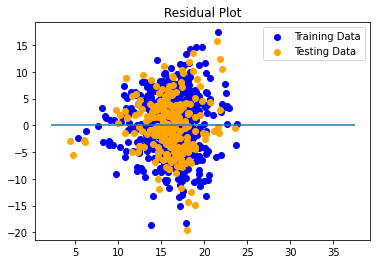

In [10]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 27.977868387029883
R-squared (R2 ): 0.18818066668785238
